In [1]:
import numpy as np

data=np.load('data.npy')
target=np.load('target.npy')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
import keras
from keras.layers import *
from keras.models import * 
from keras.preprocessing import image

Using TensorFlow backend.


In [3]:
from keras import Input
from keras.callbacks import ModelCheckpoint


In [4]:
data.shape

(392, 224, 224, 3)

In [5]:
target.shape

(392,)

In [6]:
for i in range(target.shape[0]):
    print(target[i])

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


In [7]:
# CNN Based Model in Keras

model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])

In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 110, 110, 64)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 54, 54, 64)       

In [9]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [10]:
train_data.shape

(352, 224, 224, 3)

In [11]:
test_data.shape

(40, 224, 224, 3)

In [12]:
train_target.shape

(352,)

In [13]:
hist = model.fit(train_data,train_target,epochs=10,validation_split=0.1,batch_size=64)

Train on 316 samples, validate on 36 samples
Epoch 1/10
316/316 [==============================] - 72s 228ms/step - loss: 1.6736 - accuracy: 0.5095 - val_loss: 0.6989 - val_accuracy: 0.4444
Epoch 2/10
316/316 [==============================] - 62s 195ms/step - loss: 0.7008 - accuracy: 0.5253 - val_loss: 0.6832 - val_accuracy: 0.5556
Epoch 3/10
316/316 [==============================] - 69s 218ms/step - loss: 0.6633 - accuracy: 0.5854 - val_loss: 0.6482 - val_accuracy: 0.9167
Epoch 4/10
316/316 [==============================] - 69s 217ms/step - loss: 0.6083 - accuracy: 0.6741 - val_loss: 0.5774 - val_accuracy: 0.8333
Epoch 5/10
316/316 [==============================] - 70s 223ms/step - loss: 0.4485 - accuracy: 0.8165 - val_loss: 0.3262 - val_accuracy: 0.9444
Epoch 6/10
316/316 [==============================] - 68s 217ms/step - loss: 0.2817 - accuracy: 0.8892 - val_loss: 0.1917 - val_accuracy: 0.9444
Epoch 7/10
316/316 [==============================] - 67s 212ms/step - loss: 0.2157 -

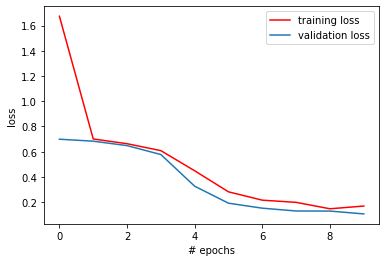

In [14]:
plt.plot(hist.history['loss'],'r',label='training loss')
plt.plot(hist.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

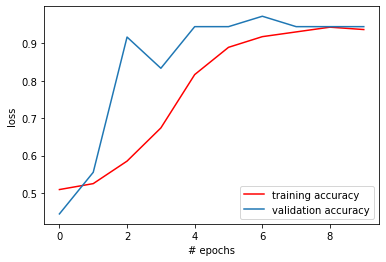

In [15]:
plt.plot(hist.history['accuracy'],'r',label='training accuracy')
plt.plot(hist.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [16]:
print(model.evaluate(test_data,test_target))

40/40 [==============================] - 2s 41ms/step
[0.16494626998901368, 0.925000011920929]


In [17]:
from sklearn import metrics

In [18]:
y_pred=model.predict(test_data)

In [19]:
test_data.shape

(40, 224, 224, 3)

In [20]:
y_pred=y_pred.reshape(-1)

In [21]:
final_pred=[]
for i in range(y_pred.shape[0]):
    if y_pred[i]<=0.5:
        final_pred.append(0)
    else:
        final_pred.append(1)

In [22]:
final_pred=np.array(final_pred)

In [23]:
import itertools

In [24]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_target, final_pred)

In [25]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [26]:
cm_plot_labels = ['covid_positive','covid_negative']

Confusion matrix, without normalization
[[24  1]
 [ 2 13]]


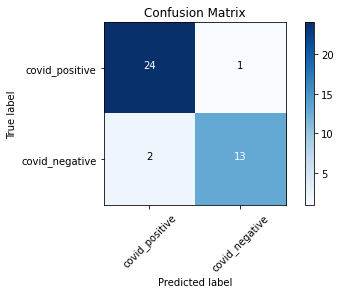

In [27]:
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [28]:
from sklearn.metrics import classification_report
target_names=['class 0','class 1']
print(classification_report(test_target,final_pred,target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.92      0.96      0.94        25
     class 1       0.93      0.87      0.90        15

    accuracy                           0.93        40
   macro avg       0.93      0.91      0.92        40
weighted avg       0.93      0.93      0.92        40



In [29]:
def plot_roc_cur(fper, tper):  
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

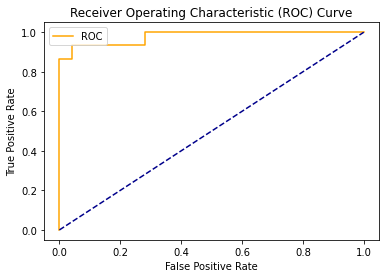

In [31]:
from sklearn.metrics import roc_curve
fper, tper, threshold = roc_curve(test_target, y_pred)
plot_roc_cur(fper, tper)

In [32]:
from sklearn.metrics import roc_auc_score
roc_auc_score(test_target,y_pred)

0.9786666666666667